## Name: **Freddy Fernandes** 



#**Task 1: Prediction using Supervised Machine learning**

---
**Predicting the percentage of marks that is student is expected to score depends on the number of hours they study each day**



In [3]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [7]:
url="https://bit.ly/3s9WTHh"
data= pd.read_csv(url)
print("Data imported successfully")
data.head(12)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
data.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
data.isnull().sum().head()

Hours     0
Scores    0
dtype: int64

#**Data discovery and visualization**




In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [15]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


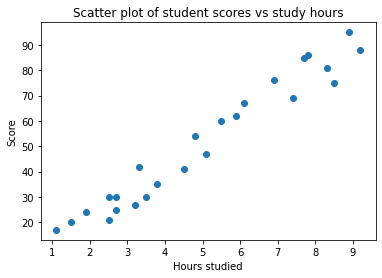

In [16]:
plt.scatter(x=data.Hours, y=data.Scores)
plt.xlabel("Hours studied")
plt.ylabel("Score")
plt.title("Scatter plot of student scores vs hours studied")
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7e331eba8>,
      dtype=object)

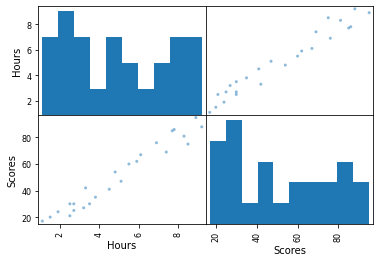

In [17]:
from pandas.plotting import scatter_matrix
attributes = ['Hours' , 'Scores']
scatter_matrix(data[attributes] , )

# **Filling missing attributes**




In [19]:
data.mean()
datal = data.fillna(data.mean())
datal.isnull().sum()

Hours     0
Scores    0
dtype: int64

# **Searching for correlation**

In [20]:
corr_matrix = data.corr()
corr_matrix['Scores'].sort_values(ascending=False)

Scores    1.000000
Hours     0.976191
Name: Scores, dtype: float64

# **Train Test Split**

In [26]:
x= datal.drop('Scores', axis = 'columns')
y=datal.drop('Hours', axis = "columns")
print(f"shape of x is {x.shape} \nShape of y is {y.shape}")


shape of x is (25, 1) 
Shape of y is (25, 1)


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 51)
print('x_train = ',len(x_train))
print('x_test = ',len(x_test))
print('y_train = ',len(y_train))
print('y_test = ',len(y_test))

x_train =  20
x_test =  5
y_train =  20
y_test =  5


# **making a machine learning model**

In [30]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()


In [31]:
lr_model.fit(x_train, y_train)
x_pre = lr_model.predict(x_test)
lr_model.score(x_test,y_test)


0.9238518102278781

In [33]:
dataframe = pd.DataFrame(np.c_[x_test, y_test,x_pre], columns = ['study hours','Score','Score predicted'])
dataframe

,study hours,Score,Score predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


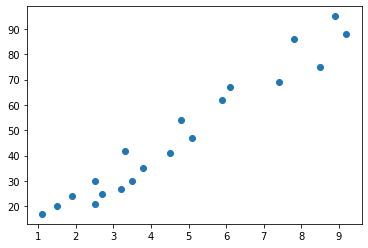

In [34]:
plt.scatter(x_train, y_train)

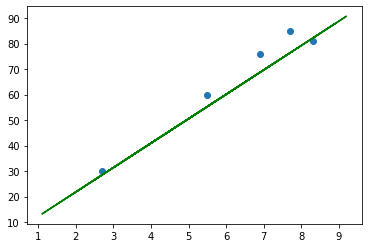

In [38]:
plt.scatter(x_test, y_test)
plt.plot(x_train, lr_model.predict(x_train), color = 'g')

# **Saving the model**

In [39]:
import joblib
joblib.dump(lr_model ,'Marks_predicting_model.pkl')

['Marks_predicting_model.pkl']

In [40]:
model= joblib.load("Marks_predicting_model.pkl")
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.predict([[8]])

array([[79.21667016]])

# **Task 1 complete.** 

# Using Supervised ML